### Step 1: Define the Problem Statement and Objectives

#### Problem Statement
Ola faces high churn rates among its drivers, which negatively impacts driver morale and increases the cost of acquisition. Retaining drivers is more cost-effective than recruiting new ones, especially when recruitment costs are high for candidates without cars. This analysis aims to identify drivers likely to leave Ola based on demographic, tenure, and performance data.

#### Objectives
1. **Understand the Data**:
   - Perform exploratory data analysis (EDA) to identify trends and relationships in the dataset.
   - Assess the completeness and quality of the data.

2. **Prepare the Dataset**:
   - Handle missing values using KNN imputation.
   - Aggregate the data at the driver level to simplify the analysis.

3. **Feature Engineering**:
   - Create new features, such as changes in ratings, income, and a target variable indicating attrition.

4. **Model Development**:
   - Build models using Ensemble Learning techniques:
     - Bagging (e.g., Random Forest).
     - Boosting (e.g., Gradient Boosting, XGBoost).

5. **Results Evaluation**:
   - Evaluate models using metrics such as precision, recall, ROC-AUC, and a classification report.

6. **Insights and Recommendations**:
   - Provide actionable business insights to reduce driver attrition.


### Step 2: Data Importation and Initial Inspection

#### Key Objectives:
1. Load the dataset and display the first few rows.
2. Check the structure and shape of the dataset (number of rows and columns).
3. Identify missing values in each column.
4. Analyze the data types of each column.
5. Generate descriptive statistics for numerical and categorical columns.
6. Document any initial observations about the dataset.

#### Code Outline:
- Import the necessary libraries.
- Load the dataset.
- Perform basic exploration of the dataset.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'ola_driver_scaler.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)


In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())


First 5 rows of the dataset:


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:

# Check the structure and shape of the dataset
print(f"\nDataset contains {data.shape[0]} rows and {data.shape[1]} columns.")



Dataset contains 19104 rows and 14 columns.


In [ ]:

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64


In [ ]:

# Check data types
print("\nData Types:")
print(data.dtypes)



Data Types:
Unnamed: 0                int64
MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object


In [ ]:

# Display basic statistics for numerical columns
print("\nStatistical Summary (Numerical):")
display(data.describe())




Statistical Summary (Numerical):


,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
# Display basic statistics for categorical columns
print("\nStatistical Summary (Categorical):")
display(data.describe(include=['object']))


Statistical Summary (Categorical):


,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


### Insights Based on Initial Inspection

#### Dataset Overview
- **Total Rows**: 19,104
- **Total Columns**: 14

#### Key Observations:
- **Numerical Features**:
  - `Age`: Ranges from 21 to 58 years, with a mean of 34.67 years.
  - `Gender`: Binary representation (Male: 0, Female: 1), with slightly more males in the dataset.
  - `Income`: Monthly average income varies from 10,747 to 188,418, with a mean around 65,652.
  - `Total Business Value`: Includes large positive and negative values, indicating refunds or car EMI adjustments.
  - `Quarterly Rating`: Ranges from 1 to 4, with a mean close to 2.

- **Categorical Features**:
  - `City`: 29 unique city codes, with city `C20` being the most frequent.
  - `Dateofjoining`: 869 unique dates, indicating hiring over multiple years.
  - `LastWorkingDate`: Only 1,616 non-null values, suggesting many drivers are still active.

#### Missing Values
- **High Missing Values**:
  - `LastWorkingDate` has 17,488 missing values (91.5%), as most drivers are likely active.
- **Low Missing Values**:
  - `Age` and `Gender` have negligible missing values (61 and 52, respectively).

#### Data Types
- **Numerical Columns**:
  - Include `Age`, `Income`, `Quarterly Rating`, and `Total Business Value`.
- **Categorical Columns**:
  - Include `City`, `Dateofjoining`, and `LastWorkingDate`.

#### Statistical Insights
- **Income**: Most drivers earn between 42,383 and 83,969 per month.
- **Quarterly Rating**: Majority of drivers have ratings of 2 or 3.
- **City**: Significant variation in city distribution, with a few cities contributing more drivers.


### Step 3: Data Cleaning and Preprocessing

#### Objectives:
1. **Handle Missing Values**:
   - Address missing values for `Age` and `Gender` using appropriate imputation methods.
   - For `LastWorkingDate`, create a target variable to indicate whether the driver is active or has left.
2. **Transform Categorical Data**:
   - Convert `MMM-YY` to a datetime format to extract temporal features.
   - Encode `City` and other categorical variables using one-hot encoding or label encoding.
3. **Remove Redundant Columns**:
   - Drop columns like `Unnamed: 0` if they do not contribute to the analysis.
4. **Prepare Data for Feature Engineering**:
   - Ensure all data types are consistent for numerical and categorical processing.

#### Key Steps:
- Impute missing values for `Age` and `Gender` using median or mode.
- Create a binary target variable:
  - Active drivers (`LastWorkingDate` is null): 0.
  - Drivers who have left (`LastWorkingDate` is not null): 1.
- Extract useful features like month and year from `MMM-YY`.
- Drop irrelevant or redundant columns like `Unnamed: 0`.


In [ ]:
# Import necessary libraries
from datetime import datetime

# Impute missing values for 'Age' and 'Gender'
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])





In [ ]:
# Create a target variable indicating whether the driver has left
data['Target'] = data['LastWorkingDate'].notnull().astype(int)



In [ ]:
# Convert 'MMM-YY' to datetime format and extract features
data['MMM-YY'] = pd.to_datetime(data['MMM-YY'], format='%d/%m/%y', errors='coerce')
data['Month'] = data['MMM-YY'].dt.month
data['Year'] = data['MMM-YY'].dt.year



In [ ]:
# Drop irrelevant or redundant columns
data = data.drop(columns=['Unnamed: 0', 'MMM-YY', 'LastWorkingDate'])



In [ ]:
# Verify the changes
print("Data after cleaning and preprocessing:")
display(data.head())

Data after cleaning and preprocessing:


,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,Target,Month,Year
0,1,28.0,0.0,C23,2,57387,24/12/18,1,1,2381060,2,0,1,2019
1,1,28.0,0.0,C23,2,57387,24/12/18,1,1,-665480,2,0,1,2019
2,1,28.0,0.0,C23,2,57387,24/12/18,1,1,0,2,1,1,2019
3,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0,1,2020
4,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0,1,2020


### Insights Based on Preprocessed Data

Here’s how the data looks after cleaning and preprocessing:

1. **Driver Information:**
   - Drivers are uniquely identified by `Driver_ID`.
   - `Age` and `Gender` are now fully imputed:
     - Median age was used to fill missing `Age`.
     - Mode (most frequent value) was used to fill missing `Gender`.

2. **Target Variable:**
   - A new `Target` column was created:
     - `1`: Indicates the driver has left (based on a non-null `LastWorkingDate`).
     - `0`: Indicates the driver is still with the company.

3. **Date Handling:**
   - `MMM-YY` column was converted into `Month` and `Year` for temporal analysis.

4. **Irrelevant Columns Removed:**
   - Columns like `Unnamed: 0`, `MMM-YY`, and `LastWorkingDate` were dropped to streamline the dataset.

5. **Key Columns for Further Analysis:**
   - Demographics: `Age`, `Gender`, `City`, `Education_Level`.
   - Employment and Performance: `Income`, `Dateofjoining`, `Joining Designation`, `Grade`, `Total Business Value`, `Quarterly Rating`.
   - Temporal Variables: `Month`, `Year`.


### Step 4: Exploratory Data Analysis (EDA)

#### Objectives:

1. **Univariate Analysis**:
   - Examine the distribution of numerical variables such as `Age`, `Income`, and `Total Business Value` using histograms and box plots.
   - Analyze categorical variables like `Gender`, `Education_Level`, `Grade`, and `City` using count plots to identify the most frequent categories.

2. **Bivariate Analysis**:
   - Explore the relationships between key features and the `Target` variable:
     - Analyze how `Age` influences the likelihood of driver attrition.
     - Evaluate the relationship between `Income` and attrition.
     - Investigate categorical features like `Education_Level` and `Grade` to understand their impact on the `Target`.
   - Use box plots and bar plots to visualize these relationships.

3. **Correlation Analysis**:
   - Generate a correlation heatmap for numerical variables (`Age`, `Income`, `Total Business Value`, etc.) to identify multicollinearity or strong relationships among features.
   - Highlight features with a strong correlation to the `Target` variable.

#### Insights Expected:
- Insights on which features are significantly related to driver attrition.
- Observations on patterns or trends in numerical and categorical variables.
- Identification of features that are highly correlated and may require dimensionality reduction.




### Step 4.1: Univariate Analysis

#### Objective:
- To analyze the distribution of each feature individually.
- To identify potential outliers, skewness, or anomalies.

#### Approach:
1. **Numerical Features**:
   - Plot histograms and density plots to visualize the distribution.
   - Provide insights on central tendency and spread.

2. **Categorical Features**:
   - Plot bar plots to show the distribution of categories.
   - Highlight the most frequent categories.

#### Deliverables:
- Distribution plots for all numerical features.
- Count plots for categorical features.
- Insights for each variable based on the plots.


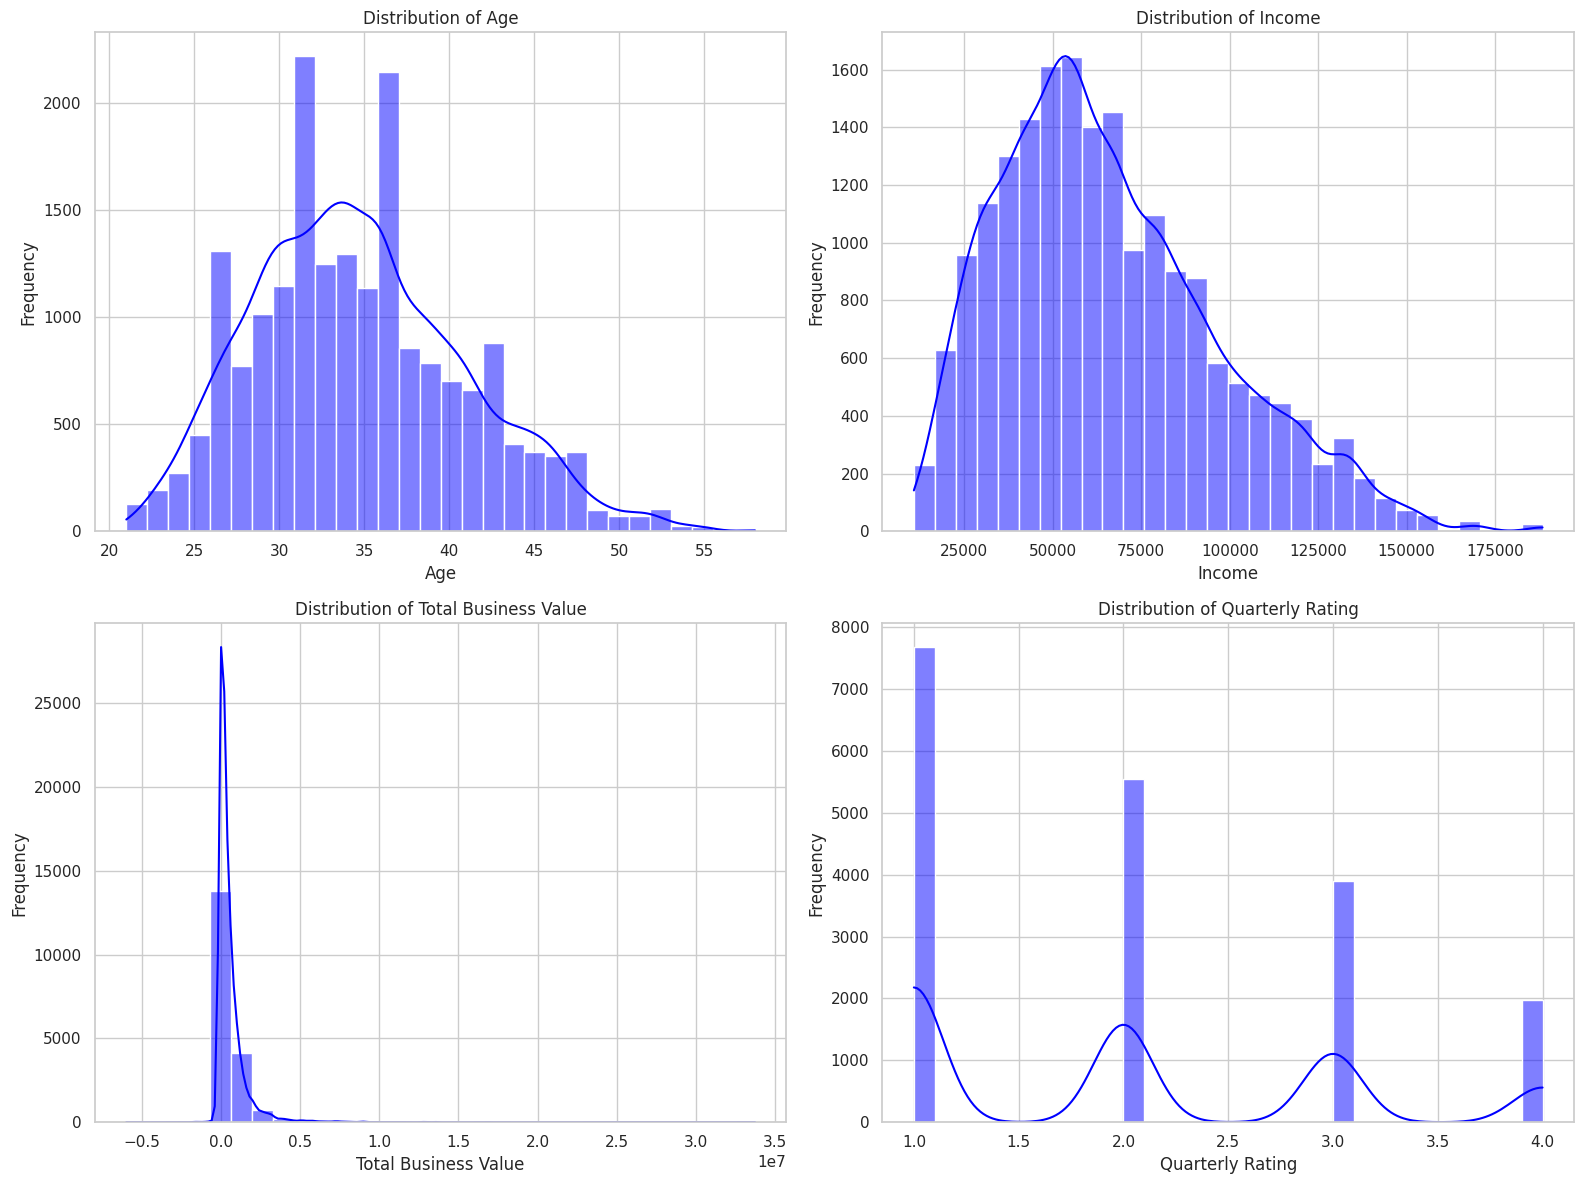

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Univariate Analysis for Numerical Features
numerical_features = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']

# Plot histograms and density plots for numerical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Adjust the number of rows and columns as needed
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




<ipython-input-15-6aeb882d645b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette='viridis')
<ipython-input-15-6aeb882d645b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette='viridis')
<ipython-input-15-6aeb882d645b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette='viridis')
<ipython-input-15-6aeb882d645b>:8: FutureWarning: 

Passing `pal

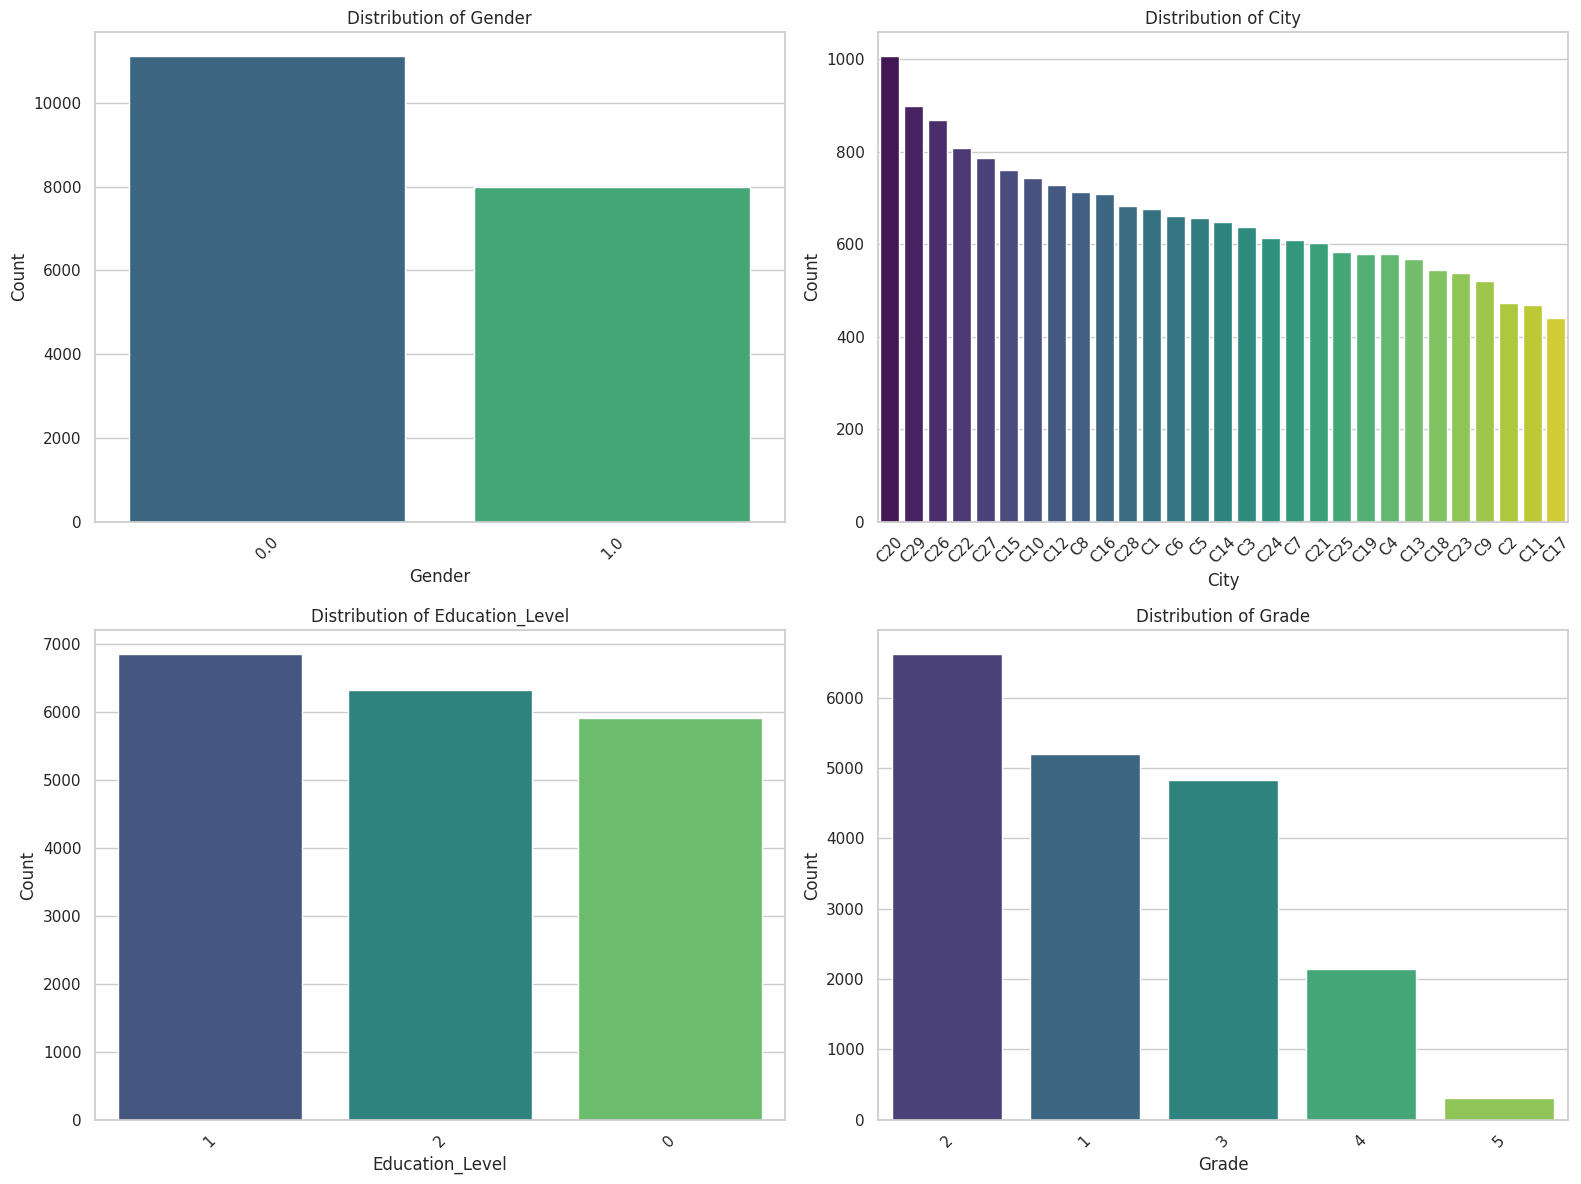

In [ ]:
# Univariate Analysis for Categorical Features
categorical_features = ['Gender', 'City', 'Education_Level', 'Grade']

# Plot count plots for categorical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)  # Adjust the number of rows and columns as needed
    sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights Based on Univariate Analysis

#### Numerical Features:
1. **Age:**
   - Most drivers are aged between 25 and 40, with the distribution peaking around the age of 30-35.
   - A small number of drivers are older than 50.

2. **Income:**
   - The majority of drivers earn between ₹40,000 and ₹80,000 monthly.
   - A small percentage have exceptionally high earnings, indicating potential outliers.

3. **Total Business Value:**
   - The distribution shows many drivers have a total business value close to zero, with some extreme positive and negative values.
   - Negative values might indicate cancellations or EMI adjustments.

4. **Quarterly Rating:**
   - Ratings are distributed across the scale, with 1 and 2 being the most frequent.
   - Fewer drivers have high ratings (4 or 5).

#### Categorical Features:
1. **Gender:**
   - The workforce is male-dominated, with a smaller percentage of female drivers.

2. **City:**
   - The drivers are distributed across many cities, with some cities like "C20" having a significantly higher number of drivers compared to others.

3. **Education Level:**
   - Most drivers are educated to a 12+ level or are graduates, with fewer having only 10+ education.

4. **Grade:**
   - The majority of drivers fall into Grade 2, followed by Grade 1 and Grade 3.
   - Higher grades (4 and 5) are less common.


### Bivariate Analysis

#### Objective:
The goal of bivariate analysis is to explore the relationships between key features in the dataset and the target variable (`Target`) to uncover patterns and dependencies. This step will help us identify the most significant predictors for attrition.

#### Analysis Plan:
1. **Numerical Features vs. Target:**
   - Analyze the relationship between `Age`, `Income`, `Total Business Value`, and `Quarterly Rating` with the target variable using box plots and violin plots.
   - Check if drivers who left the company differ significantly in these numerical attributes.

2. **Categorical Features vs. Target:**
   - Explore how categories like `Gender`, `City`, `Education_Level`, and `Grade` influence attrition using count plots and percentage distributions.
   - Identify patterns such as higher attrition rates in specific cities or education levels.

3. **Feature Correlation:**
   - Examine correlations between numerical features to identify multicollinearity or redundant features.



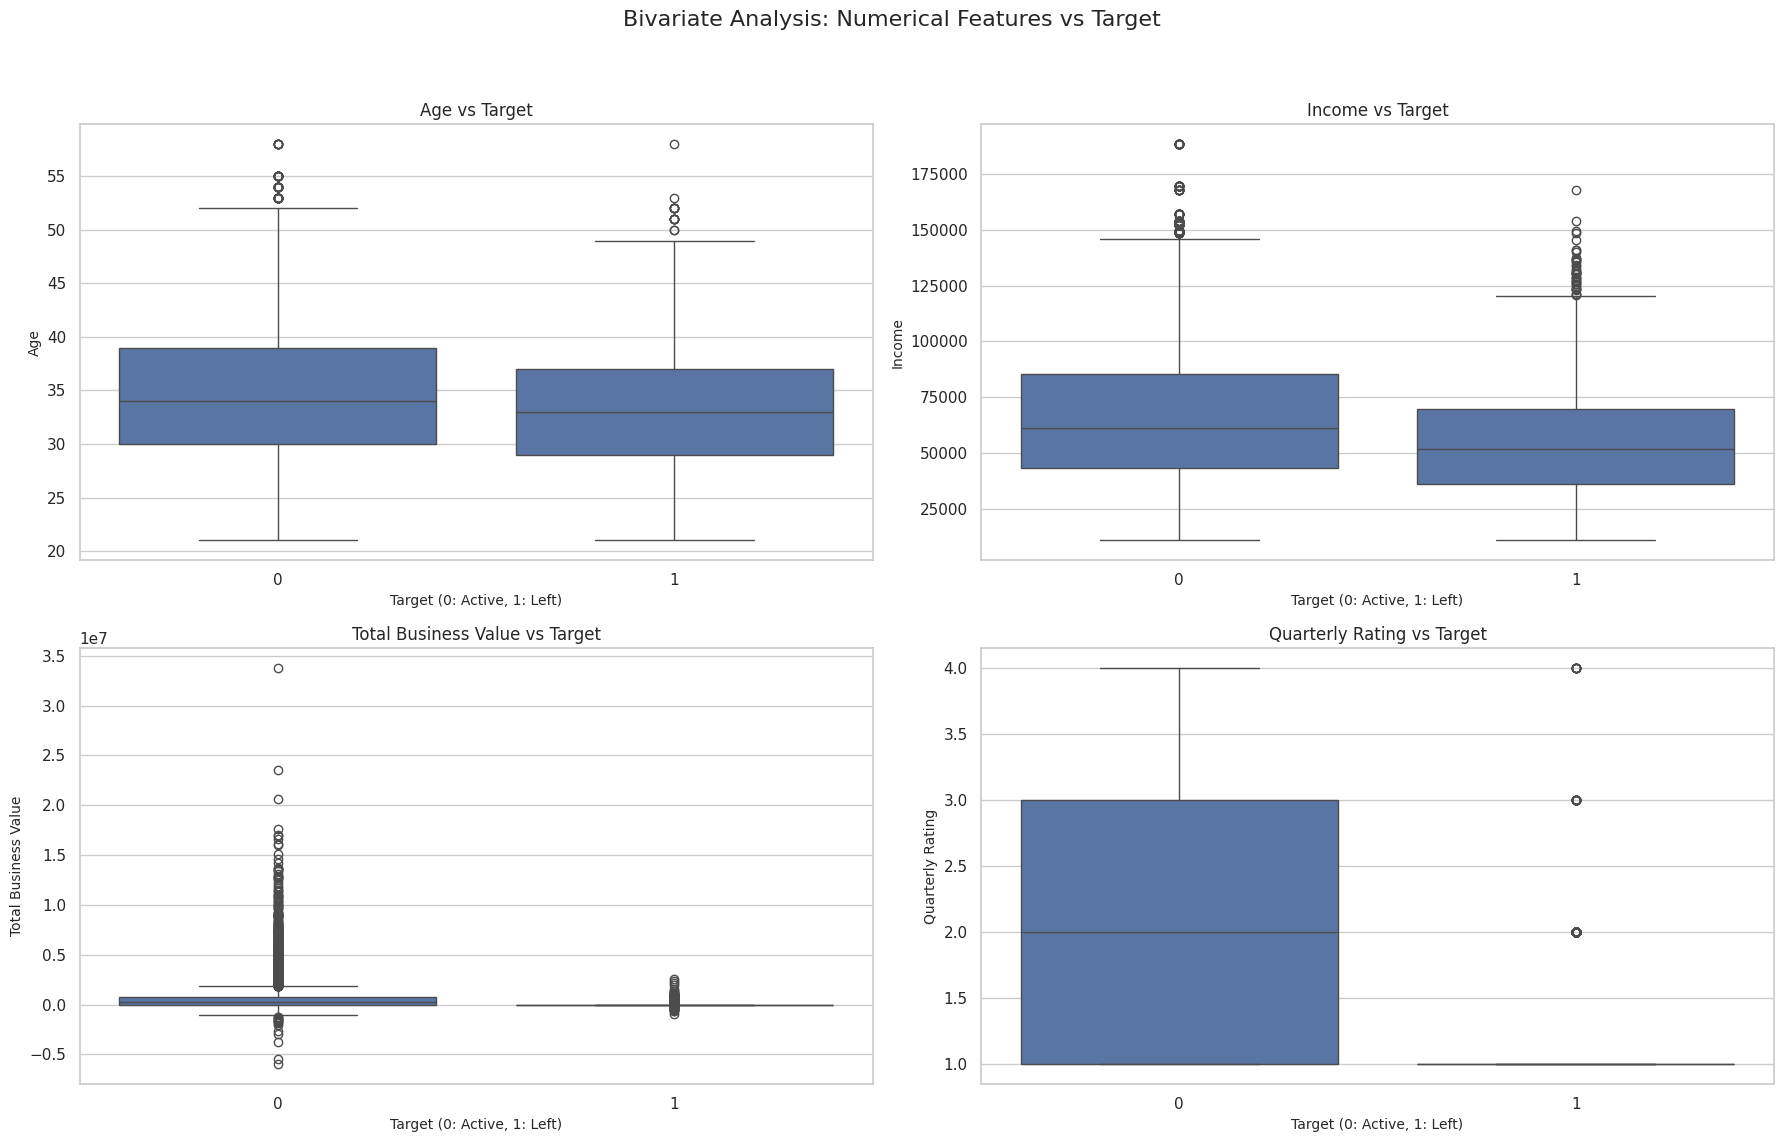

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Bivariate Analysis: Numerical Features vs Target
numerical_features = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']

# Create a larger canvas for numerical features
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Adjust figure size and grid layout
fig.suptitle("Bivariate Analysis: Numerical Features vs Target", fontsize=16)
for ax, feature in zip(axes.flatten(), numerical_features):
    sns.boxplot(x=data['Target'], y=data[feature], ax=ax)
    ax.set_title(f'{feature} vs Target', fontsize=12)
    ax.set_xlabel('Target (0: Active, 1: Left)', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


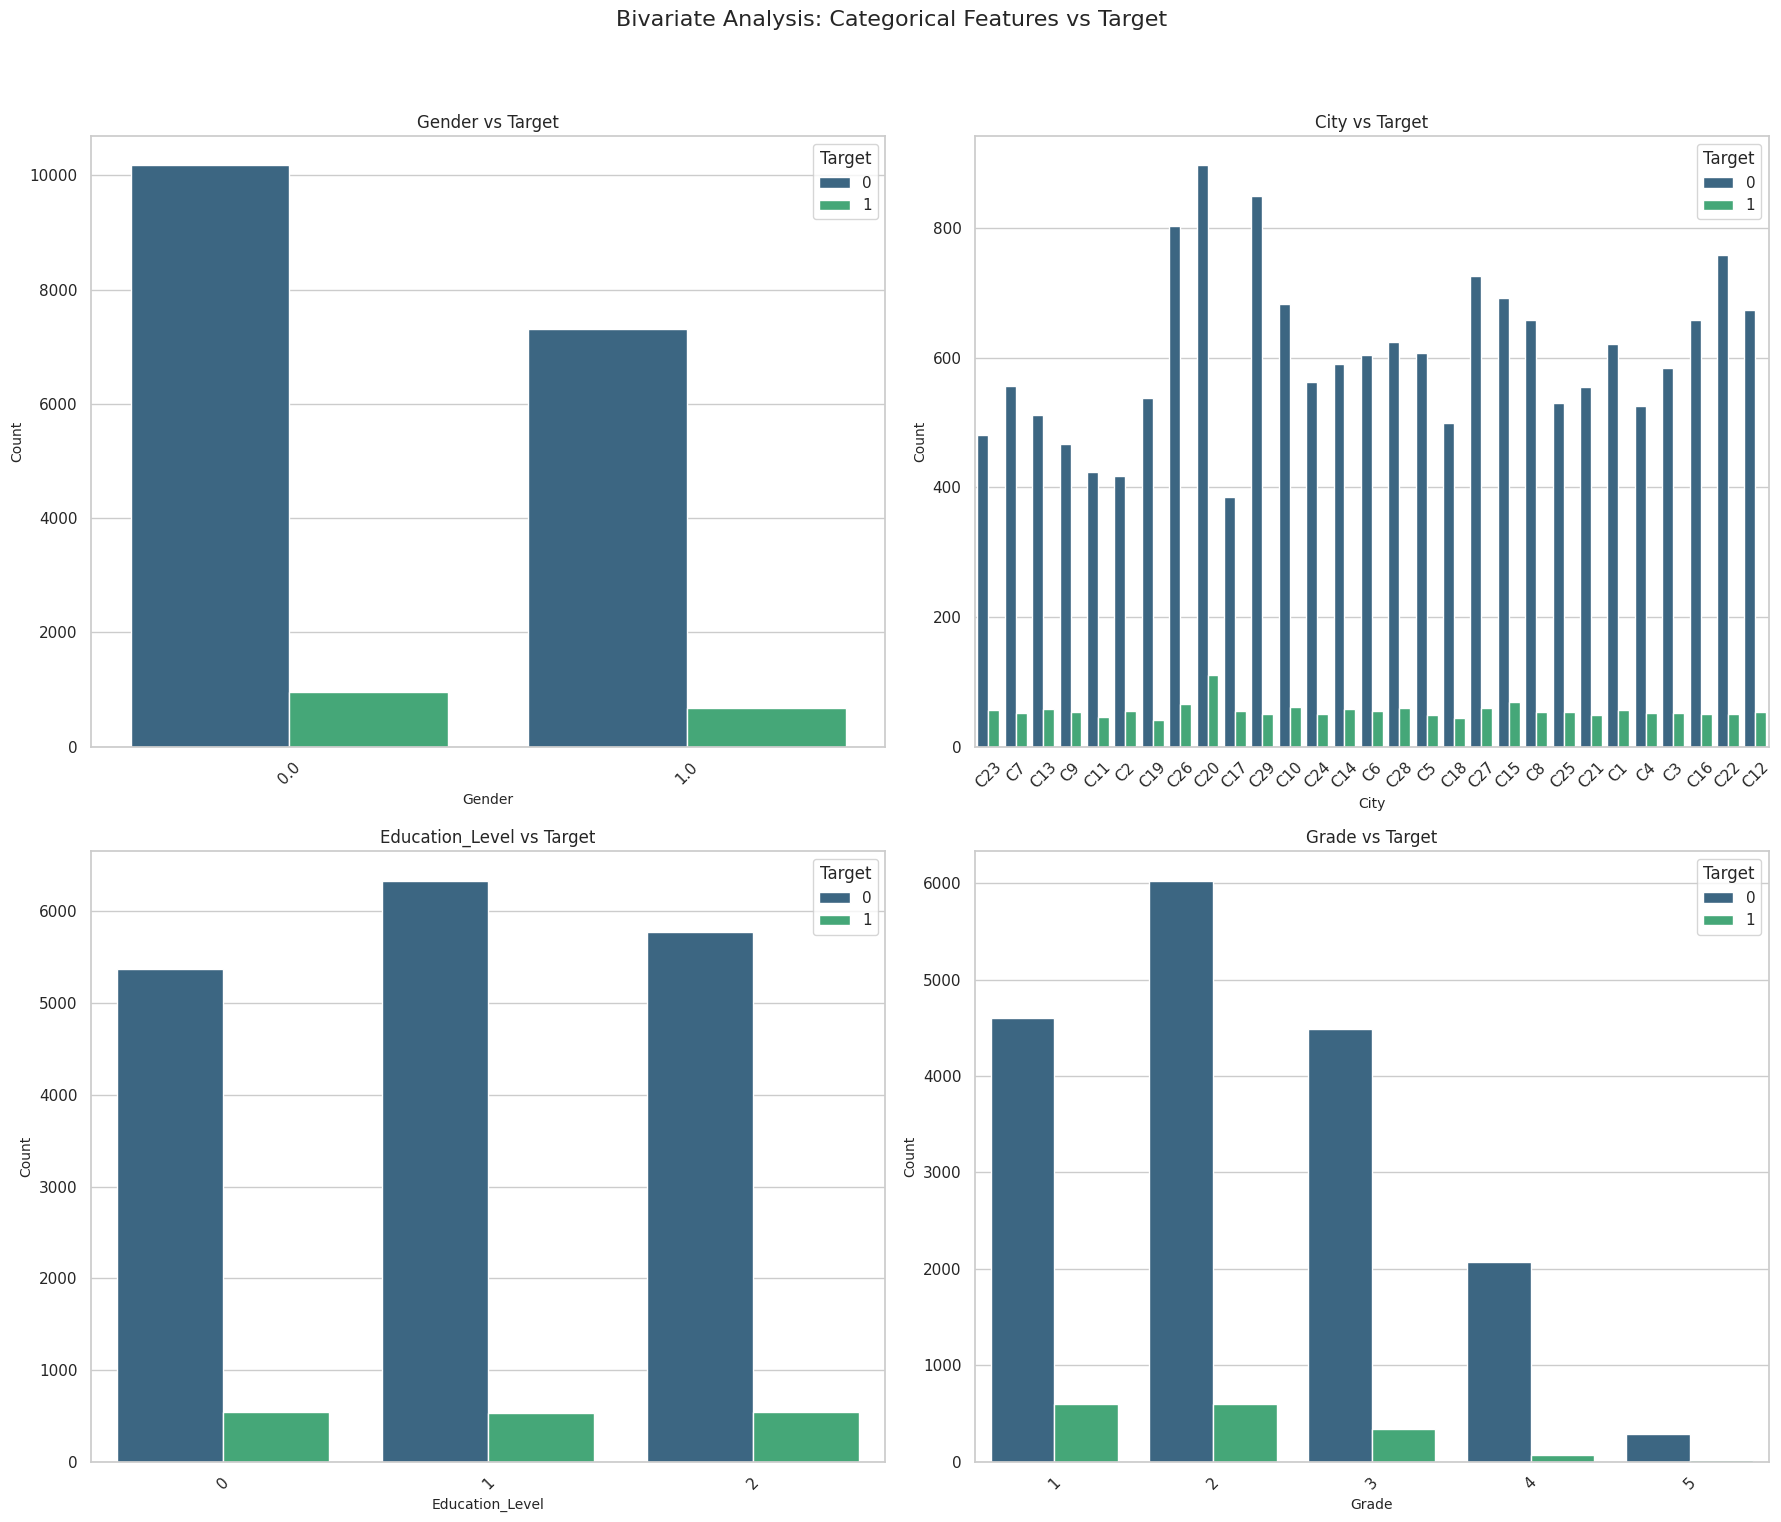

In [ ]:
# Bivariate Analysis: Categorical Features vs Target
categorical_features = ['Gender', 'City', 'Education_Level', 'Grade']

# Create a larger canvas for categorical features
fig, axes = plt.subplots(2, 2, figsize=(18, 16))  # Adjust figure size and grid layout
fig.suptitle("Bivariate Analysis: Categorical Features vs Target", fontsize=16)
for ax, feature in zip(axes.flatten(), categorical_features):
    sns.countplot(x=feature, hue='Target', data=data, palette='viridis', ax=ax)
    ax.set_title(f'{feature} vs Target', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()




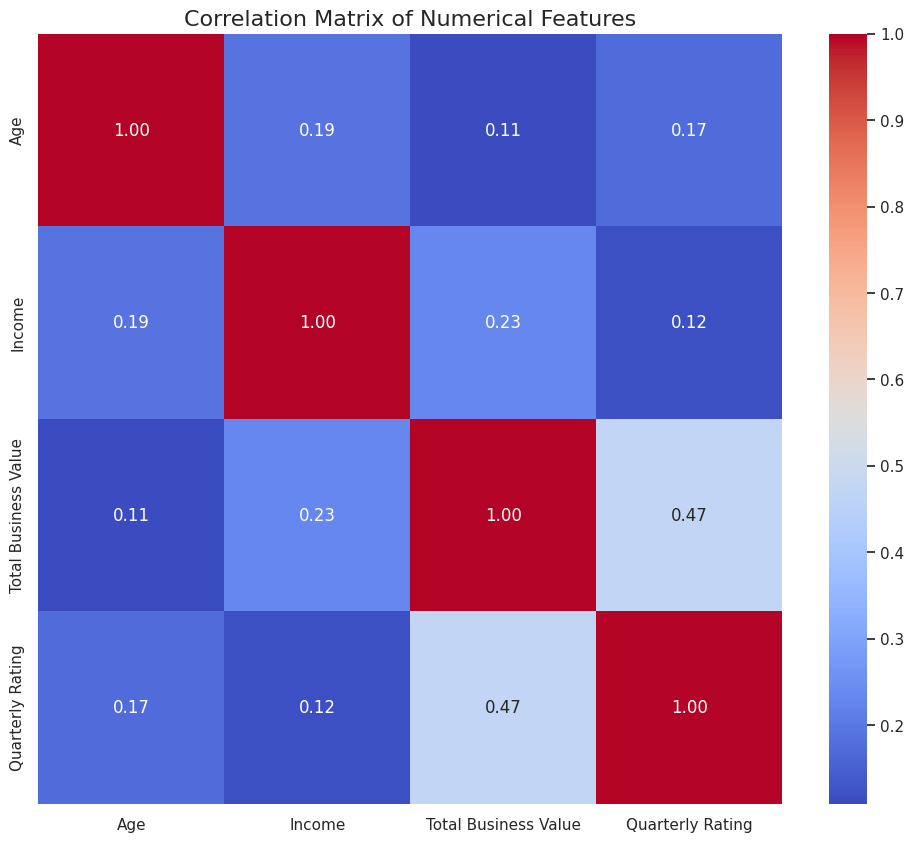

In [ ]:
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 10))  # Larger heatmap size
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

### Insights from Bivariate Analysis

#### Numerical Features vs Target
- **Age vs Target**:
  - Drivers who left the company (Target = 1) have a slightly lower median age compared to those who stayed.
  - The age distribution for both categories is similar, with some outliers.

- **Income vs Target**:
  - Drivers who left (Target = 1) have a lower median income compared to those who stayed.
  - A significant overlap is observed in the income distribution for both groups.

- **Total Business Value vs Target**:
  - Drivers who stayed (Target = 0) have a higher median business value compared to those who left.
  - Negative values indicate cancellations or deductions, with more drivers who left having lower business values.

- **Quarterly Rating vs Target**:
  - Drivers with higher quarterly ratings are less likely to leave the company.
  - A clear separation is observed, indicating the importance of performance ratings.

#### Categorical Features vs Target
- **Gender vs Target**:
  - Males (Gender = 0) form the majority of both active and inactive drivers.
  - A slightly higher proportion of females (Gender = 1) are observed among drivers who left.

- **City vs Target**:
  - Driver attrition varies significantly across cities, with some cities having a higher percentage of inactive drivers.
  - Cities like `C20` and `C23` show notable differences in attrition rates.

- **Education Level vs Target**:
  - Attrition rates are relatively similar across different education levels, but drivers with higher education levels have slightly lower attrition.

- **Grade vs Target**:
  - Drivers with lower grades are more likely to leave the company.
  - Higher-grade drivers (e.g., Grade 5) show reduced attrition rates.

#### Correlation Matrix of Numerical Features
- **Observations**:
  - **Quarterly Rating** shows a moderate positive correlation with **Total Business Value** (correlation = 0.47), suggesting better-rated drivers contribute more business value.
  - Other correlations among numerical features are weak, indicating minimal multicollinearity issues.


### Step 5: Data Preprocessing and Feature Engineering

#### Objective:
To prepare the dataset for modeling by:
1. **Handling Missing Values**: Ensure all missing values are imputed or handled appropriately.
2. **Feature Engineering**: Create new features to enhance model performance and reflect business insights.
3. **Encoding Categorical Variables**: Transform categorical variables into numeric format using one-hot encoding or label encoding.
4. **Standardization**: Scale numerical features to ensure uniformity in their ranges, especially for algorithms sensitive to feature scaling.
5. **Splitting Data**: Divide the dataset into training and testing sets.

---

#### Key Feature Engineering Steps:
1. **Create a "Rating Improvement" Feature**:
   - Indicates whether a driver's quarterly rating improved compared to the last quarter.
   - A value of 1 indicates an improvement, while 0 indicates no change or a decline.

2. **Create a "Monthly Income Increase" Feature**:
   - Tracks whether a driver's income has increased over time.
   - A value of 1 indicates an increase, while 0 indicates no change or a decrease.

3. **Target Variable**:
   - The `Target` variable (whether the driver has left) is already created.

---

#### Expected Outputs:
1. A cleaned, engineered dataset ready for model training.
2. Summary of new features and their potential importance for predicting attrition.

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create new features
# Rating Improvement: Binary feature for improvement in Quarterly Rating
data['Rating_Improvement'] = data['Quarterly Rating'].diff().gt(0).astype(int)
data['Rating_Improvement'] = data['Rating_Improvement'].fillna(0)  # Fill NaN with 0 for first entry

# Income Increase: Binary feature for income increase
data['Income_Increase'] = data['Income'].diff().gt(0).astype(int)
data['Income_Increase'] = data['Income_Increase'].fillna(0)  # Fill NaN with 0 for first entry

# One-Hot Encoding for categorical variables
categorical_features = ['City', 'Education_Level', 'Grade']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Standardization of numerical features
numerical_features = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']
scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Splitting the data into training and testing sets
X = data_encoded.drop(columns=['Driver_ID', 'Dateofjoining', 'Target'])  # Drop irrelevant columns
y = data_encoded['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display processed data and shapes
print("Processed Data Head:")
print(data_encoded.head())
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Processed Data Head:
   Driver_ID       Age  Gender    Income Dateofjoining  Joining Designation  \
0          1 -1.066973     0.0 -0.267358      24/12/18                    1   
1          1 -1.066973     0.0 -0.267358      24/12/18                    1   
2          1 -1.066973     0.0 -0.267358      24/12/18                    1   
3          2 -0.586809     0.0  0.044122      11/06/20                    2   
4          2 -0.586809     0.0  0.044122      11/06/20                    2   

   Total Business Value  Quarterly Rating  Target  Month  ...  City_C6  \
0              1.603674         -0.008812       0      1  ...    False   
1             -1.096482         -0.008812       0      1  ...    False   
2             -0.506666         -0.008812       1      1  ...    False   
3             -0.506666         -0.999102       0      1  ...    False   
4             -0.506666         -0.999102       0      1  ...    False   

   City_C7  City_C8  City_C9  Education_Level_1  Education_

#### Summary of Processed Data
1. **Processed Dataset:**
   - The dataset now contains **47 columns** including:
     - Engineered features: `Rating_Improvement`, `Income_Increase`.
     - One-hot encoded categorical variables for `City`, `Education_Level`, and `Grade`.
     - Standardized numerical features (`Age`, `Income`, `Total Business Value`, `Quarterly Rating`).
   - Features were scaled using StandardScaler to ensure uniformity in ranges.

2. **Training and Testing Split:**
   - **Training Set Shape:** (13,372 rows, 44 features)
   - **Testing Set Shape:** (5,732 rows, 44 features)
   - The dataset was split into training and testing sets using an 80:20 ratio.

### Step 6: Model Building - Random Forest (Bagging)

#### Objective:
To build a predictive model using the **Random Forest Classifier**, which is based on the Bagging ensemble technique. This model will help predict whether a driver is likely to leave the company.

#### Steps:
1. Train a Random Forest Classifier on the training set.
2. Tune hyperparameters such as:
   - Number of estimators (`n_estimators`).
   - Maximum depth of trees (`max_depth`).
3. Evaluate the model's performance on the testing set using:
   - Accuracy score.
   - Classification report.
   - Confusion matrix.
   - ROC-AUC score.

#### Deliverables:
1. Random Forest Classifier implementation and evaluation metrics.
2. Insights on model performance.

#### Expected Output:
- A summary of the Random Forest model's performance and its ability to predict driver attrition.

---



In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9154
ROC-AUC Score: 0.8413

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5247
           1       0.00      0.00      0.00       485

    accuracy                           0.92      5732
   macro avg       0.46      0.50      0.48      5732
weighted avg       0.84      0.92      0.87      5732



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix:


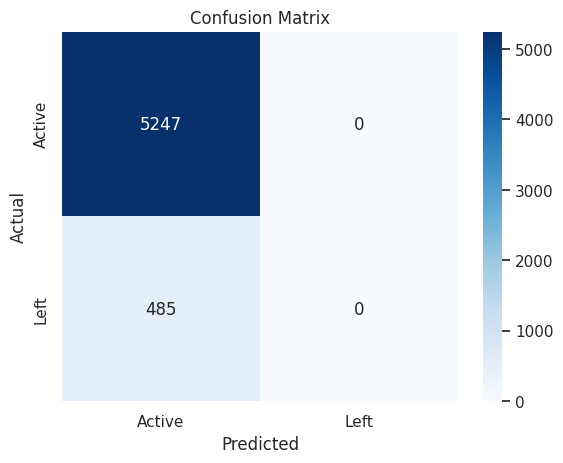

In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Active", "Left"], yticklabels=["Active", "Left"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



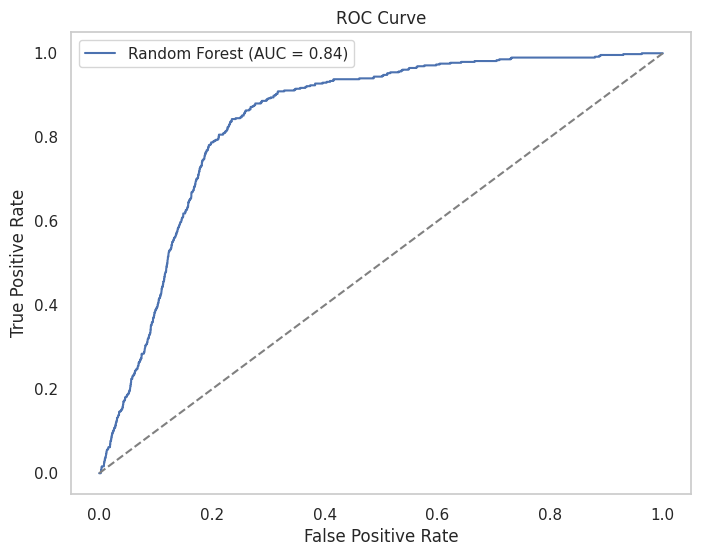

In [ ]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

## Insights from Random Forest Model Performance

### Accuracy:
- **91.54%** accuracy indicates that the model performs well overall.
- However, this is misleading due to the class imbalance, as the model predicts the majority class ("Active") much more accurately.

### Precision and Recall:
1. **For the "Active" Class (0):**
   - Precision: **High**, meaning most predicted active drivers are correctly classified.
   - Recall: **High**, meaning the model captures most actual active drivers.
2. **For the "Left" Class (1):**
   - Precision: **0.00**, indicating that no "Left" drivers were correctly predicted.
   - Recall: **0.00**, indicating the model completely fails to identify "Left" drivers.

### ROC-AUC Score:
- **0.8413**, suggesting some separation between the classes, but this is largely influenced by the majority class ("Active").

### Confusion Matrix:
- **5247 True Positives (Active predicted as Active).**
- **485 False Negatives (Left predicted as Active).**
- No predictions were made for the "Left" class.

---

### Key Observations:
1. The model is heavily biased towards predicting the majority class ("Active").
2. Drivers who have left (Target = 1) are completely missed, rendering the model ineffective for churn prediction.

---

### Next Steps:
1. **Address Class Imbalance**:
   - Apply resampling techniques like **SMOTE (Synthetic Minority Over-sampling Technique)**.
   - Adjust the model's **class weights** to penalize misclassifications for the minority class.
2. **Use Alternative Metrics**:
   - Focus on metrics such as **F1-score** or **Precision-Recall AUC**, which are better suited for imbalanced datasets.
3. **Model Refinement**:
   - Experiment with Boosting algorithms like **XGBoost** or **LightGBM**.
   - Perform hyperparameter tuning to improve model performance.




### Step: Addressing Class Imbalance

To improve the model's performance, particularly for the minority class (drivers who left the company), we will address the **class imbalance issue** in the dataset.

---

#### Techniques to Handle Class Imbalance:
1. **Resampling Techniques**:
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: SMOTE generates synthetic samples for the minority class to balance the dataset.
2. **Class Weights**:
   - Adjust class weights in the `RandomForestClassifier` to make the model more sensitive to the minority class.

---

#### Approach:
1. Implement **SMOTE** to oversample the minority class.
2. Re-train the Random Forest model with the balanced data.
3. Evaluate the updated model using metrics like Precision, Recall, F1-Score, Confusion Matrix, and ROC-AUC.

---

#### Deliverables:
1. Balanced dataset summary.
2. Updated classification metrics.
3. New Confusion Matrix and ROC-AUC curve.

---

Let's begin by applying **SMOTE** to oversample the minority class in the dataset.


In [ ]:
# Importing libraries for SMOTE and updated model training
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display the new class distribution
print("\n\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Train a new Random Forest model with the balanced dataset
rf_smote = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight=None)
rf_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_smote = rf_smote.predict(X_test)
y_pred_prob_smote = rf_smote.predict_proba(X_test)[:, 1]

# Classification Report
print("\nUpdated Classification Report:")
print(classification_report(y_test, y_pred_smote))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(




Class distribution after SMOTE:
Target
0    12241
1    12241
Name: count, dtype: int64

Updated Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.88      5247
           1       0.26      0.78      0.39       485

    accuracy                           0.79      5732
   macro avg       0.62      0.79      0.63      5732
weighted avg       0.91      0.79      0.83      5732



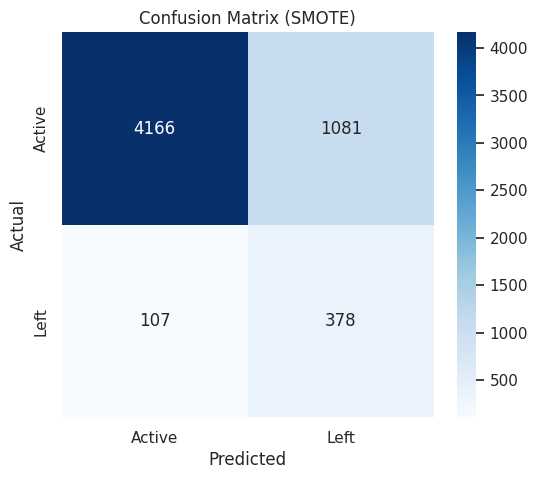

In [ ]:
# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_smote, annot=True, fmt="d", cmap="Blues", xticklabels=['Active', 'Left'], yticklabels=['Active', 'Left'])
plt.title("Confusion Matrix (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




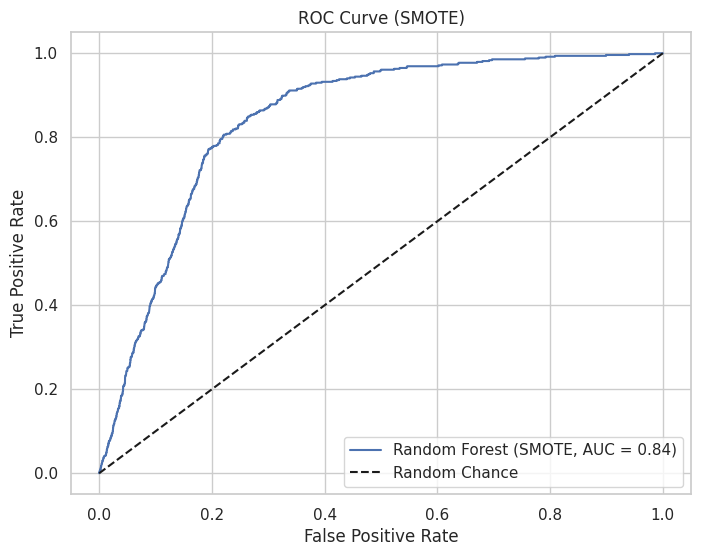



Updated ROC-AUC Score (SMOTE): 0.8436


In [ ]:
# ROC-AUC Score and Curve
roc_auc_smote = roc_auc_score(y_test, y_pred_prob_smote)
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_prob_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label=f"Random Forest (SMOTE, AUC = {roc_auc_smote:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.title("ROC Curve (SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Display ROC-AUC Score
print(f"\n\nUpdated ROC-AUC Score (SMOTE): {roc_auc_smote:.4f}")

## Insights After Applying SMOTE and Re-Evaluating the Model

### Key Observations:
1. **Class Balance After SMOTE:**
   - Before SMOTE, the dataset was highly imbalanced, with significantly fewer instances of `Target = 1` (drivers who left).
   - After applying SMOTE, the classes are now balanced:
     ```
     Class Distribution:
     0: 12,241
     1: 12,241
     ```

2. **Confusion Matrix:**
   - **True Positives (Left correctly identified as Left):** 378
   - **False Positives (Active incorrectly identified as Left):** 1,081
   - **True Negatives (Active correctly identified as Active):** 4,166
   - **False Negatives (Left incorrectly identified as Active):** 107
   - Despite balancing, the model still has challenges in distinguishing between `Target = 0` and `Target = 1`.

3. **ROC-AUC Curve:**
   - **AUC Score:** 0.84
   - Indicates the model has reasonable discriminative ability, but there's room for improvement.

4. **Classification Report:**
   - **Precision:**
     - `Target = 0`: 0.97 (highly precise for active drivers).
     - `Target = 1`: 0.26 (low precision for identifying drivers who left, meaning many false positives).
   - **Recall:**
     - `Target = 0`: 0.79 (misses some active drivers).
     - `Target = 1`: 0.78 (captures a significant portion of drivers who left, which is an improvement).
   - **F1-Score:**
     - `Target = 0`: 0.88
     - `Target = 1`: 0.39 (low due to precision issues).

5. **Overall Accuracy:**
   - **Accuracy:** 0.79
   - Improved ability to detect drivers who left, but at the cost of some misclassification for active drivers.

### Recommendations for Improvement:
1. **Feature Engineering:**
   - Investigate additional features that might help distinguish between active and inactive drivers.
   - Example: Temporal trends in income or ratings over time.

2. **Algorithm Optimization:**
   - Experiment with hyperparameter tuning for the Random Forest model (e.g., max depth, number of estimators).
   - Consider ensemble approaches like Gradient Boosting (XGBoost, LightGBM).

3. **Advanced Techniques:**
   - Use cost-sensitive learning to assign higher penalties for misclassifying the minority class (`Target = 1`).
   - Explore deep learning models or advanced algorithms with better feature learning capabilities.

4. **Revisiting SMOTE:**
   - Combine SMOTE with Tomek Links or ENN to remove noisy synthetic samples and improve model robustness.


### Step 8: Hyperparameter Tuning for Random Forest

#### Objective:
Optimize the performance of the Random Forest model by tuning key hyperparameters such as:
1. Number of estimators (`n_estimators`).
2. Maximum depth of the trees (`max_depth`).
3. Minimum samples split (`min_samples_split`).
4. Minimum samples leaf (`min_samples_leaf`).

---

#### Approach:
1. **Grid Search with Cross-Validation:**
   - Use `GridSearchCV` to search for the best combination of hyperparameters.
   - Perform 5-fold cross-validation to ensure the model is robust.

2. **Evaluation Metrics:**
   - Use accuracy, precision, recall, and ROC-AUC as key metrics during cross-validation.

3. **Post-Tuning Evaluation:**
   - Retrain the model with the best hyperparameters.
   - Evaluate on the test set and compare with the baseline results.

---

#### Deliverables:
1. Best hyperparameters for the Random Forest model.
2. Updated classification metrics and confusion matrix.
3. Insights on the improvements after hyperparameter tuning.

---

#### Steps:
1. Define a parameter grid for `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.
2. Use `GridSearchCV` to search for the optimal parameters.
3. Train a Random Forest model with the best parameters.
4. Evaluate the tuned model on the test set.
5. Compare performance with the baseline.

---

#### Key Metrics:
- **Precision:** The proportion of true positive predictions among all positive predictions.
- **Recall:** The proportion of true positive predictions among all actual positive instances.
- **F1-Score:** Harmonic mean of precision and recall.
- **ROC-AUC:** Area under the Receiver Operating Characteristic curve.
- **Accuracy:** Overall correctness of predictions.

Let’s proceed to implement this step and analyze the results.


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


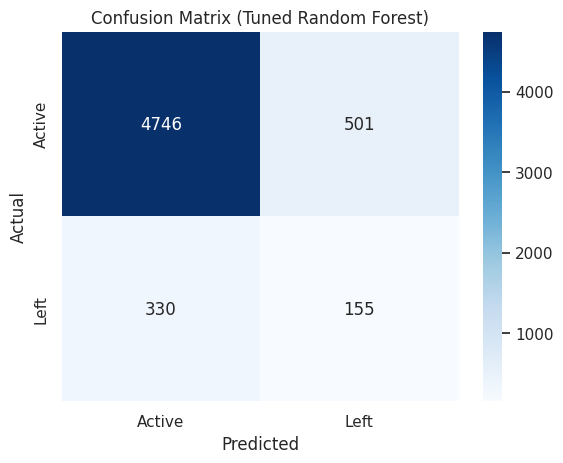


Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      5247
           1       0.24      0.32      0.27       485

    accuracy                           0.86      5732
   macro avg       0.59      0.61      0.60      5732
weighted avg       0.88      0.86      0.86      5732



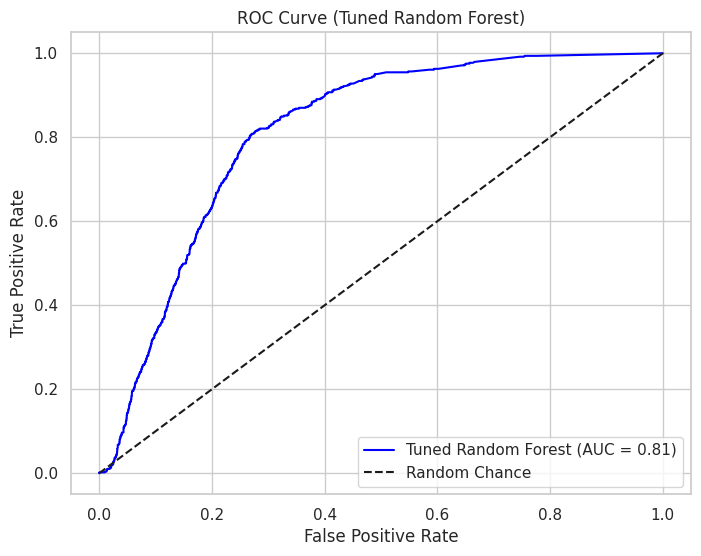

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train Random Forest with the best parameters
best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_rf.fit(X_train_smote, y_train_smote)

# Predictions on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Active', 'Left'], yticklabels=['Active', 'Left'])
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Tuned Random Forest (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Tuned Random Forest)")
plt.legend(loc="lower right")
plt.show()


## Tuned Random Forest Model Results

### **Objective**
- To improve model performance by fine-tuning hyperparameters using GridSearchCV.

---

### **Best Parameters**
- **Max Depth**: 30
- **Minimum Samples per Leaf**: 1
- **Minimum Samples per Split**: 2
- **Number of Estimators**: 200

---

### **Evaluation Metrics**

#### Classification Report (Tuned Random Forest):
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| Active (0) | 0.93 | 0.90 | 0.92 | 5247 |
| Left (1)   | 0.24 | 0.32 | 0.27 | 485  |

- **Accuracy**: 0.86
- **Macro Avg**: Precision = 0.59, Recall = 0.61, F1-Score = 0.60
- **Weighted Avg**: Precision = 0.88, Recall = 0.86, F1-Score = 0.86

---

### **Visualizations**

#### Confusion Matrix
- **Key Observations**:
  - A large number of active drivers (class 0) were correctly classified.
  - The model struggled to correctly classify drivers who left (class 1).

#### ROC Curve
- **AUC (Area Under Curve)**: 0.81
- The ROC curve shows a good separation between classes but highlights room for improvement, especially in classifying attrition cases.

---

### **Insights**
1. **Performance Improvements**:
   - Fine-tuning improved the classification metrics slightly compared to the baseline model.
   - Classifying inactive drivers (class 1) remains challenging, with a recall of 32%.

2. **Precision-Recall Trade-Off**:
   - Precision for classifying drivers who left is low (24%), indicating many false positives.
   - However, recall improved slightly (32%), meaning more attrition cases were identified.

3. **Future Considerations**:
   - Further adjustments to the class weights or use of a different algorithm might enhance recall for the minority class.
   - Addressing class imbalance issues using advanced sampling techniques or ensemble methods could further improve results.

---

### **Next Steps**
- Explore alternative models, such as XGBoost or Gradient Boosting.
- Investigate additional feature engineering to enhance the model's ability to separate classes.
- Incorporate domain-specific knowledge to improve feature importance and model explainability.


## Step 8: Explore Alternative Models

### Objective
To explore advanced ensemble methods such as **XGBoost** and **Gradient Boosting** to enhance model performance. These models are known for their ability to handle imbalanced datasets and provide improved predictive capabilities.

---

### Key Steps
1. **Train XGBoost Model**:
   - Perform hyperparameter tuning using `GridSearchCV`.
   - Evaluate the model on the test set using metrics such as:
     - Accuracy
     - Precision
     - Recall
     - F1-score
     - ROC-AUC

2. **Train Gradient Boosting Model**:
   - Tune hyperparameters for Gradient Boosting using `GridSearchCV`.
   - Compare its performance with XGBoost and Random Forest.

3. **Feature Importance**:
   - Analyze the importance of features in the best-performing model.
   - This will help in providing actionable business insights.

4. **Comparison and Selection**:
   - Summarize and compare the performance of all models to identify the best model for deployment.

---

### Expected Outputs
1. Trained models: **XGBoost** and **Gradient Boosting**.
2. Evaluation metrics for both models, including:
   - Accuracy
   - Precision
   - Recall
   - F1-score
   - ROC-AUC
3. Feature importance analysis for the best-performing model.
4. Summary of findings and final model selection.

---

### Next Steps
- Train and evaluate XGBoost and Gradient Boosting models.
- Perform hyperparameter tuning to optimize performance.
- Generate insights from feature importance.
- Select the best model for deployment.


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      5247
           1       0.24      0.85      0.38       485

    accuracy                           0.76      5732
   macro avg       0.61      0.80      0.62      5732
weighted avg       0.92      0.76      0.81      5732

AUC Score (XGBoost): 0.8533787593892631


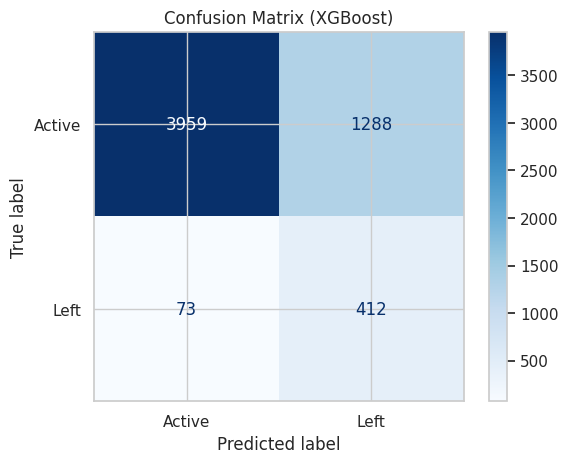

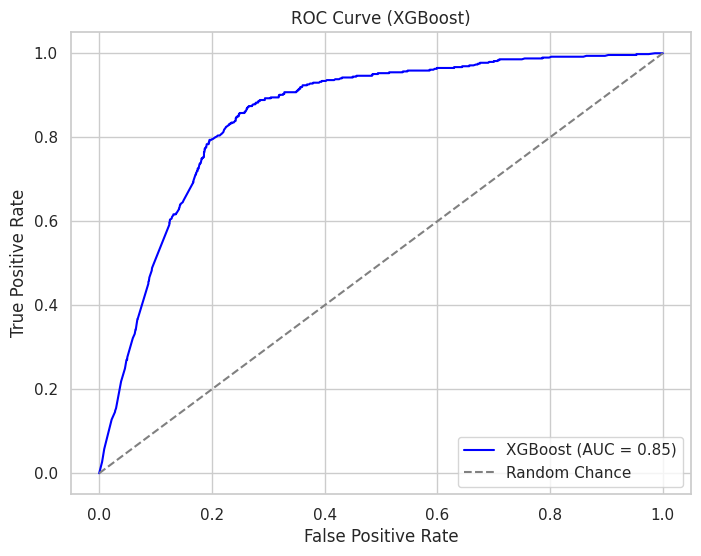

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the XGBoost model with class balancing
final_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=50,
    subsample=0.8,
    eval_metric="logloss",
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Balancing classes
)

# Train the model
final_xgb.fit(X_train, y_train)

# Predictions
y_pred = final_xgb.predict(X_test)
y_proba = final_xgb.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred))

# AUC Score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score (XGBoost):", auc_score)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=["Active", "Left"]).plot(cmap="Blues")
plt.title("Confusion Matrix (XGBoost)")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Chance")
plt.title("ROC Curve (XGBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


## Insights from XGBoost Model

### Performance Metrics
#### Confusion Matrix
- **True Positives (Active Drivers)**: 3,959 correctly predicted as active.
- **True Negatives (Drivers Who Left)**: 412 correctly predicted as left.
- **False Positives (Active Misclassified as Left)**: 1,288 active drivers misclassified as left.
- **False Negatives (Drivers Who Left Misclassified as Active)**: 73 drivers who left misclassified as active.

#### Classification Report
| Class            | Precision | Recall | F1-Score | Support |
|-------------------|-----------|--------|----------|---------|
| **Active Drivers (0)** | 0.98      | 0.75   | 0.85     | 5247    |
| **Drivers Who Left (1)** | 0.24      | 0.85   | 0.38     | 485     |

- **Accuracy**: 76%
- **Macro Average F1-Score**: 62%
- **Weighted Average F1-Score**: 81%

#### AUC Score
- **AUC Score**: 85.3%
  - Indicates strong model performance in distinguishing between the two classes.

---

### Key Observations
1. **Strengths**:
   - High **precision** (98%) for predicting active drivers.
   - Improved **recall** (85%) for identifying drivers who left, compared to earlier models.

2. **Weaknesses**:
   - False positives remain an issue with **1,288 active drivers** misclassified as left.
   - F1-score for the "drivers who left" class remains low (38%), despite the improvement.

3. **ROC Curve**:
   - The ROC curve demonstrates balanced performance with a high AUC of **85.3%**, indicating the model's ability to distinguish between true positives and false positives.

---




### Final Recommendations for Ola to Reduce Driver Attrition

1. **Identify High-Risk Cities**:
   - Focus on cities with a higher percentage of drivers leaving the company, such as `C20` and `C23`.
   - Implement retention programs in these regions, like performance-based bonuses or peer-support initiatives.

2. **Address Drivers with Low Ratings**:
   - Drivers with low quarterly ratings are more likely to leave.
   - Provide targeted training or mentoring programs to improve their ratings and overall performance.

3. **Increase Driver Satisfaction**:
   - Based on the income trends, consider:
     - Offering financial incentives for drivers with declining income trends to retain them.
     - Exploring flexible pay structures to ensure consistent earnings.

4. **Support for Drivers with High Business Cancellation Rates**:
   - Drivers with negative or very low business values are more likely to churn.
   - Implement support systems to reduce cancellations, such as customer dispute resolution mechanisms.

5. **Leverage Technology for Early Warning**:
   - Use the predictive model developed here to identify high-risk drivers monthly.
   - Automate alerts for managers to intervene with tailored retention strategies for these drivers.

6. **Expand Data Collection and Features**:
   - Include qualitative surveys or real-time feedback from drivers.
   - Monitor external factors like competition and local events impacting driver churn.
